In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.utils.prune as prune
import torch.optim as optim
import common_utils as utils
import wandb
from collections import defaultdict
import torch_pruning as tp
import gc
import matplotlib.pyplot as plt
import pickle
print(utils.device)

cpu


In [2]:
transform = transforms.Compose(
    [
    transforms.Resize((96, 96)),
    transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))
     ])


trainset = torchvision.datasets.FER2013(root='./', split="train",
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=8)

testset = torchvision.datasets.FER2013(root='./', split="test",
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=8)

In [3]:
data, labels = next(iter(testloader))
print(labels)

tensor([0, 1, 4, 6, 3, 3, 2, 0, 2, 0, 3, 0, 4, 2, 6, 2])


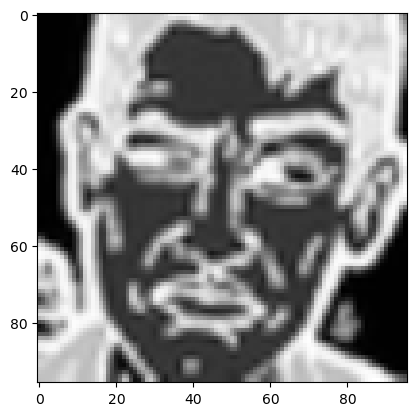

In [4]:
idx = 0
plt.imshow(data[idx].permute(1, 2, 0).numpy(), cmap="Greys")

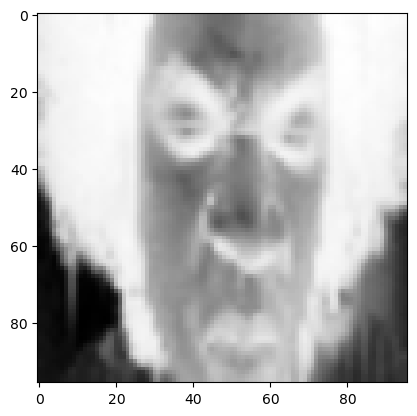

: 

In [ ]:
import cv2
cv2.namedWindow("preview")
vc = cv2.VideoCapture(0)
cv_transform = transforms.Normalize((0.5), (0.5))

if vc.isOpened(): # try to get the first frame
    rval, frame = vc.read()
else:
    rval = False
grayscale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
grayscale = cv2.resize(grayscale, (48, 48))
grayscale = cv2.resize(grayscale, (96, 96))
grayscale = torch.from_numpy(grayscale).float()
grayscale = torch.unsqueeze(torch.unsqueeze(grayscale, 0), 0)
grayscale = cv_transform(grayscale)
plt.imshow(grayscale[0].permute(1, 2, 0).numpy(), cmap="Greys")